# what is the need of lock in real life

In the context of multiprocessing, a lock is a synchronization primitive that helps prevent race conditions and ensure that only one process can access a shared resource at a time. In other words, a lock is used to control access to a shared resource by multiple processes.

When multiple processes are accessing shared data or resources concurrently, there is a possibility of conflicts and inconsistencies if proper synchronization is not implemented. A lock provides a way to enforce synchronization by allowing processes to acquire and release the lock. Only one process can hold the lock at any given time. If another process tries to acquire the lock while it is already held by a different process, it will be blocked until the lock is released.

In Python's `multiprocessing` module, you can use the `Lock` class to create a lock object. 


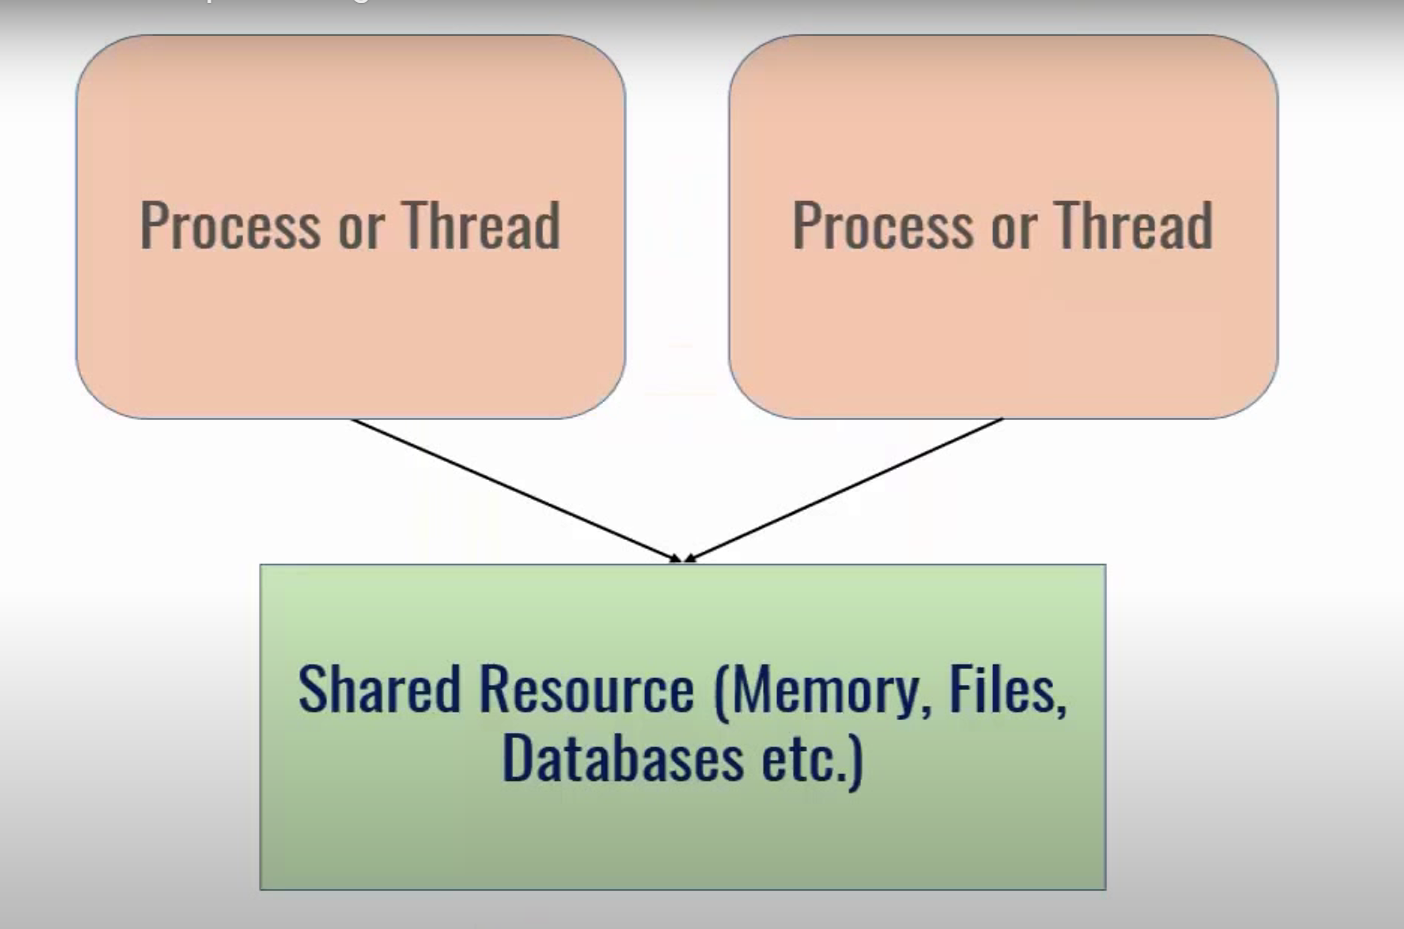

#### The given process is for what will happen if we share memory for more thread and process 

In [2]:
import time
import multiprocessing


def deposit(balance):
    for i in range(100):
        time.sleep(0.1)
        balance.value+=1 

def withdraw(balance):
    for i in range(100):
        time.sleep(0.1)
        
        balance.value-=1

if __name__ == "__main__":
    balance = multiprocessing.Value('i',200)
    p1 = multiprocessing.Process(target=deposit,args=(balance,))
    p2 = multiprocessing.Process(target=withdraw,args=(balance,))

    p1.start()
    p2.start()

    p1.join()
    p2.join()

    print(balance.value)


200


### Now we are going to use Lock in this process


In [4]:
import time
import multiprocessing

def deposit(balance,lock):
    for i in range(100):
        time.sleep(0.01)
        lock.acquire()
        balance.value+=1
        lock.release()

def withdraw(balance,lock):
    for i in range(100):
        time.sleep(0.01)
        lock.acquire()
        balance.value-=1
        lock.release()


if __name__ == '__main__':
    balance = multiprocessing.Value('i',200)
    lock = multiprocessing.Lock()
    p1 = multiprocessing.Process(target=deposit,args=(balance,lock))
    p2 = multiprocessing.Process(target=withdraw,args=(balance,lock))

    p1.start()
    p2.start()
    
    p1.join()
    p2.join()

    print(balance.value)


200


Here's a breakdown of your code:

1. **`deposit` function:** Increments the `balance` value by 1, repeating the process 100 times with a small delay (`time.sleep(0.01)`) between each increment. The `lock.acquire()` and `lock.release()` calls ensure that the critical section of code (where the `balance` variable is being modified) is protected by the lock.

2. **`withdraw` function:** Decrements the `balance` value by 1, similar to the `deposit` function. It also repeats the process 100 times with a small delay and uses the same lock for synchronization.

3. **`if __name__ == '__main__':`** This conditional statement is required for Windows systems to prevent starting new processes recursively. It creates a shared `balance` variable with an initial value of 200 and a `multiprocessing.Lock` object.

4. **`multiprocessing.Process` creation:** Two processes (`p1` and `p2`) are created, each targeting the `deposit` and `withdraw` functions, respectively.

5. **`p1.start()` and `p2.start()`:** These lines start the two processes concurrently, allowing them to execute in parallel.

6. **`p1.join()` and `p2.join()`:** These lines ensure that the main program waits for both processes to finish before proceeding. This is important to make sure the program doesn't terminate before the processes are completed.

7. **`print(balance.value)`:** Finally, the program prints the `balance` value after the concurrent deposit and withdrawal operations. Due to the lock mechanism, the final value of the `balance` variable should be consistent and accurate, demonstrating the synchronization achieved through the use of locks.
